# Исследование для интернет-магазина «Стримчик»

## Общая информация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


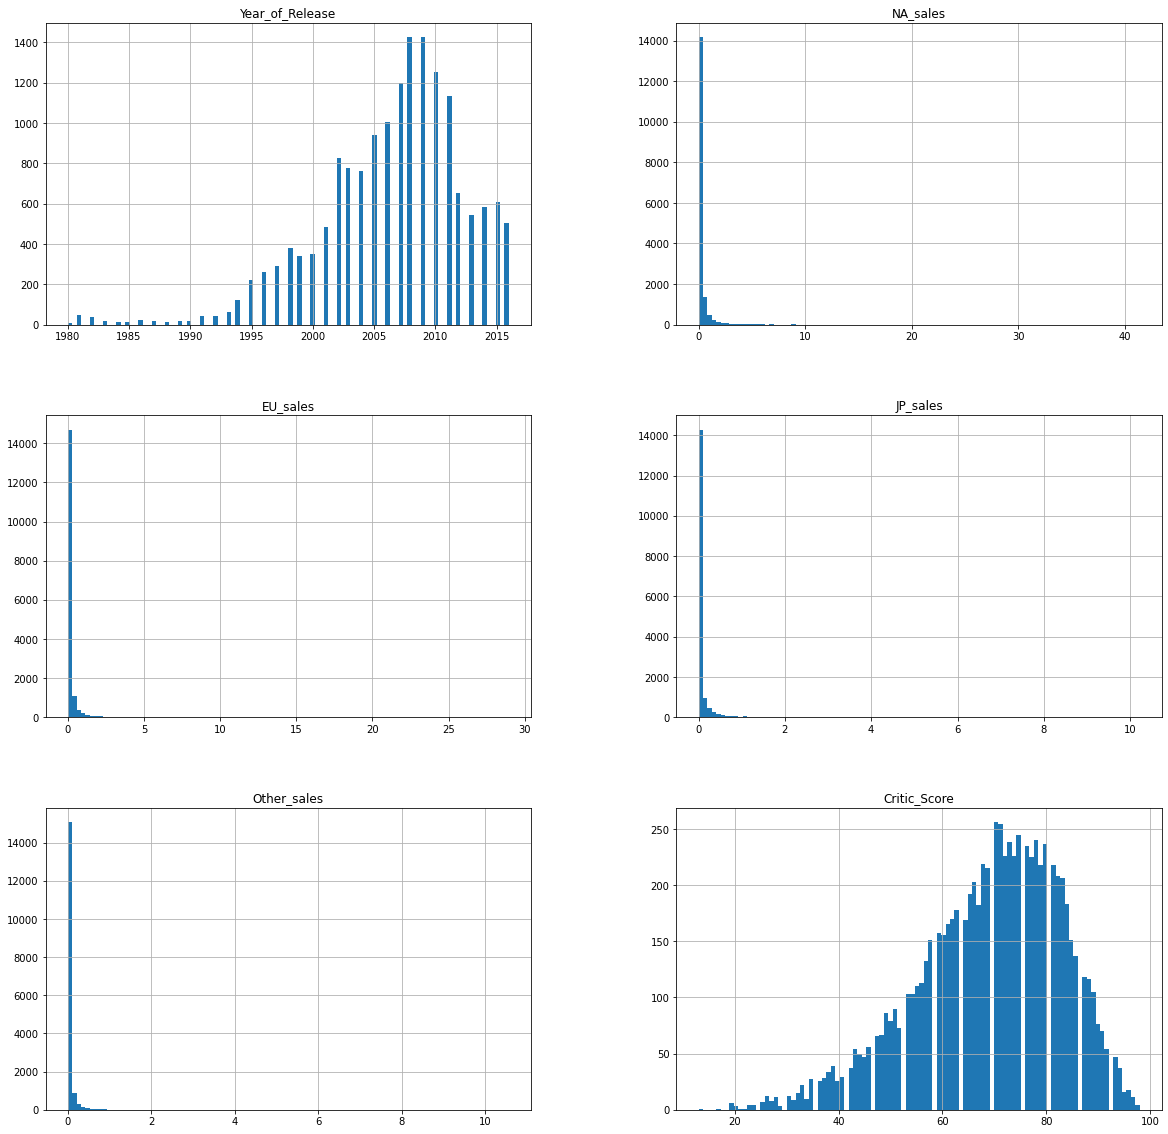

In [5]:
data.hist(bins=100, figsize=(20,20));

In [6]:
data.duplicated().sum()

0

### Вывод

Есть пропуски в сдед. столбцах:

Year_of_Release, Critic_Score, User_Score, Rating  

Явных дубликатов нет, неявных не обноружено
    
Поменять тип данных в след. столбцах:
    
year_of_release, critic_score, user_score

## Предобработка данных

### Изменение названия столбцов

In [7]:

data=data.rename(columns={'Name':'name', 
                     'Platform':'platform', 
                     'Year_of_Release':'year_of_release', 
                     'Genre':'genre', 
                     'NA_sales':'na_sales', 
                     'EU_sales':'eu_sales', 
                     'JP_sales':'jp_sales', 
                     'Other_sales':'other_sales', 
                     'Critic_Score':'critic_score', 
                     'User_Score':'user_score',
                     'Rating':'rating'}
           )

In [8]:
#замена "nan" на np.nan
data = data.replace('nan', np.nan)

### Изменение типов данных

In [9]:
#year_of_release - int
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')

In [10]:
#critic_score - int(заменить nan на np.nan)
data['critic_score'] = data['critic_score'].astype('float64',errors='ignore')
#np.floor(pd.to_numeric(data['critic_score'], errors='coerce'))

In [11]:
#user_score - float(заменить nan на np.nan)
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float64')
#data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

In [13]:
data = data.dropna(subset=['year_of_release','name','genre']).reset_index(drop=True)

### Дополнение данных

In [14]:
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [15]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод


Пропуски удалены из year_of_release (были незначительны)
Пропуски в critic_score, user_score, rating	без изменения, убирать не имеет смысла, заменить нечем


Некоторые игры появились до введения всеобщих оценок, рейтингов, а обновлять информацию, возможно, не так просто.


Есть предположение, что аббревиатура 'tbd' = np.nan, обработать его стоит аналогично пропускам


## Исследовательский анализ данных

### Количество игр, выпускаемых в год

In [17]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
year_group = data.groupby('year_of_release')['all_sales'].sum()

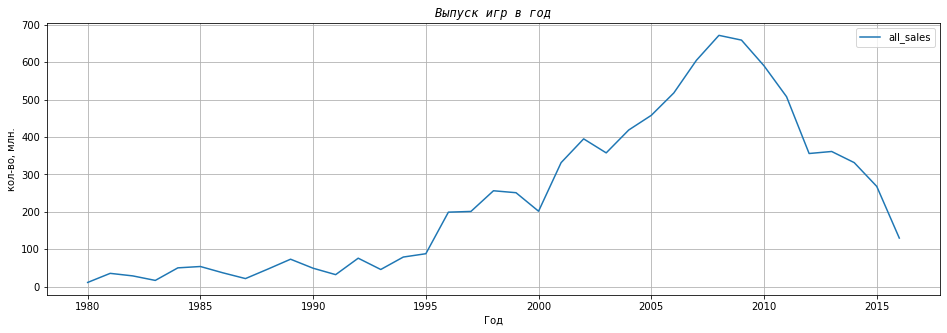

In [18]:
year_group.plot(
    legend='all',
    ylabel='кол-во, млн.',
    xlabel='Год',
    grid=True,
    figsize=(16,5)
).set_title(
    "Выпуск игр в год",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 12
);

Думаю, что за все время данные не нужны, достаточно будет посмотеть за последние 5 лет (с 2010 по наст.время)

### Платформы с большими продажами

In [19]:
#платформы с бОльшими продажами
platform_group = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
platform_group.head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: all_sales, dtype: float64

In [20]:
platform_most_sales = data.query('platform == ["PS2","X360","Wii","PS3","DS","PS","GBA","PS4"]')
platform_most_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


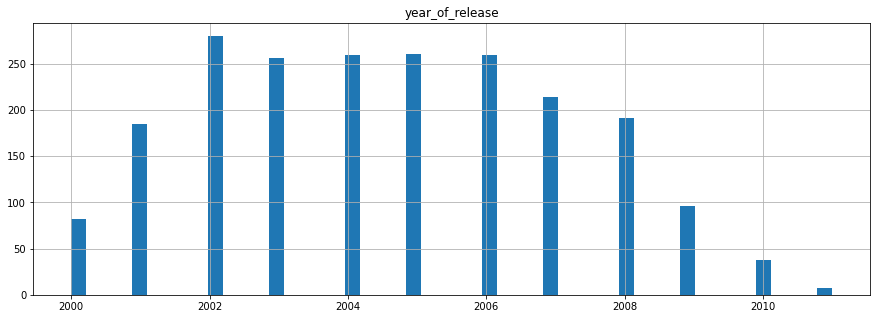

In [21]:
#PS2
platform_most_sales[platform_most_sales['platform'] == "PS2"].hist('year_of_release',bins=50, figsize=(15,5));

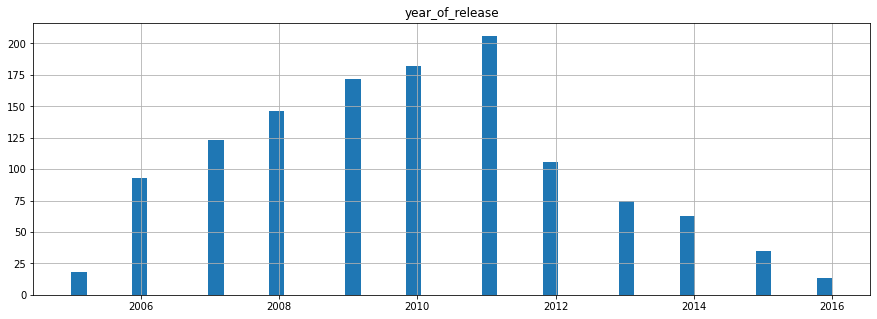

In [22]:
#X360
platform_most_sales[platform_most_sales['platform'] == "X360"].hist('year_of_release',bins=50, figsize=(15,5));

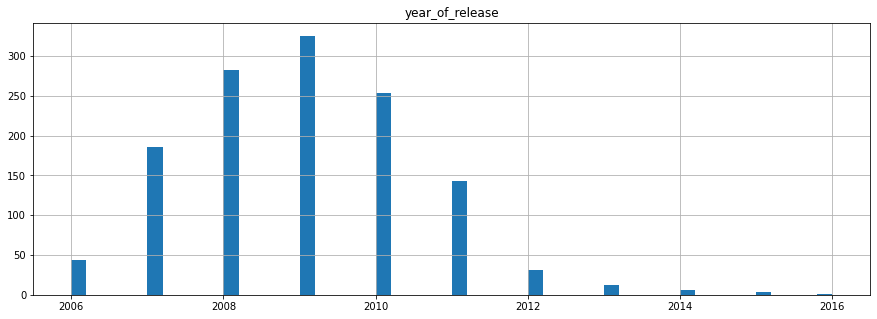

In [23]:
#Wii
platform_most_sales[platform_most_sales['platform'] == "Wii"].hist('year_of_release',bins=50, figsize=(15,5));

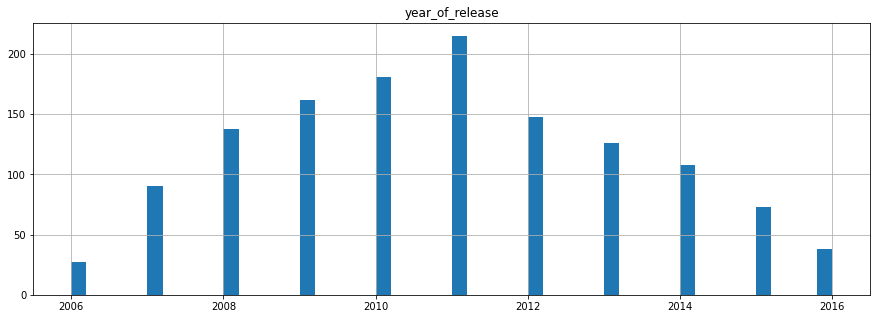

In [24]:
#PS3
platform_most_sales[platform_most_sales['platform'] == "PS3"].hist('year_of_release',bins=50, figsize=(15,5));

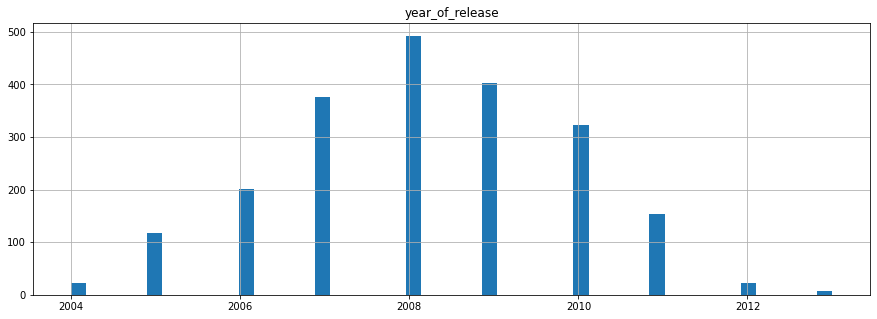

In [25]:
#DS
platform_most_sales[
    (platform_most_sales['platform'] == "DS") & (platform_most_sales['year_of_release'] > 2000)
].hist('year_of_release',bins=50, figsize=(15,5));

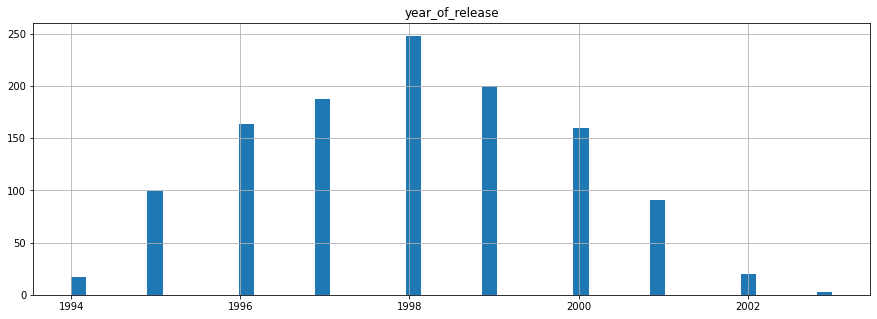

In [26]:
#PS
platform_most_sales[platform_most_sales['platform'] == "PS"].hist('year_of_release',bins=50, figsize=(15,5));

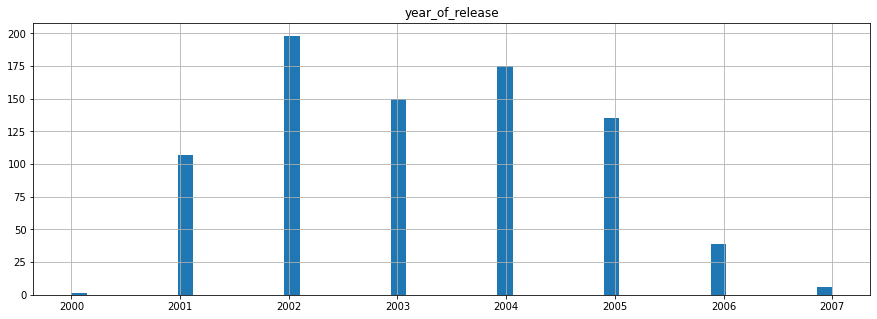

In [27]:
#GBA
platform_most_sales[platform_most_sales['platform'] == "GBA"].hist('year_of_release',bins=50, figsize=(15,5));

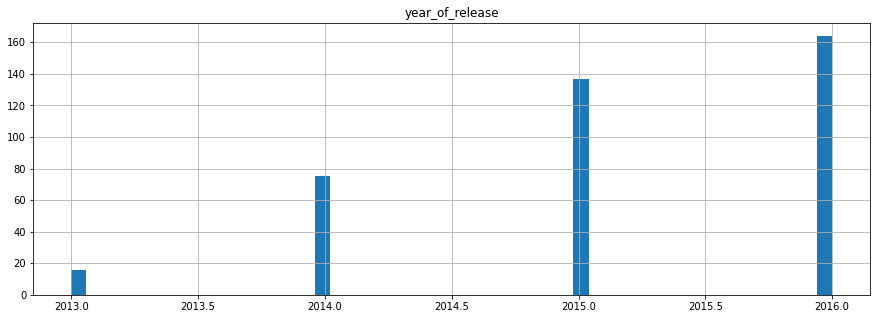

In [28]:
#PS4
platform_most_sales[platform_most_sales['platform'] == "PS4"].hist('year_of_release',bins=50, figsize=(15,5));

Примерно, 6 лет между поколениями 

### Временной промежуток исследования

In [29]:
#Данные для прогноза на 2017, это релизы с 2013 - по н.в.
new_df = data.query('year_of_release >= 2013').reset_index(drop=True)
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Анализ платформ

In [30]:
#Какие платформы лидируют по продажам, растут или падают? 
#Выберите несколько потенциально прибыльных платформ.

In [31]:
new_df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: all_sales, dtype: float64

За исследуемый период игры продаются больше всего на PS4, X360 и PS3, причем продажи последних падают

In [32]:
p_PS4 = new_df.query('platform == "PS4"')
p_PS3 = new_df.query('platform == "PS3"')
p_XOne = new_df.query('platform == "XOne"')
p_3DS = new_df.query('platform == "3DS"')
p_X360 = new_df.query('platform == "X360"')
p_WiiU = new_df.query('platform == "WiiU"')
p_PC = new_df.query('platform == "PC"')

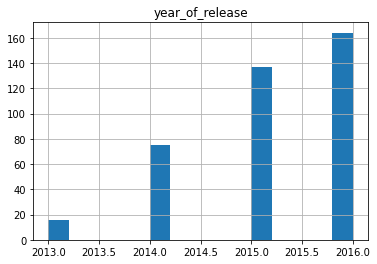

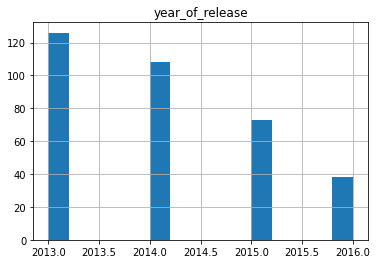

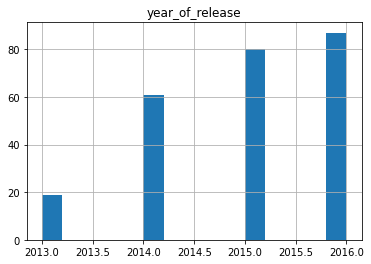

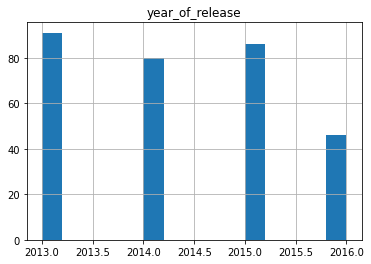

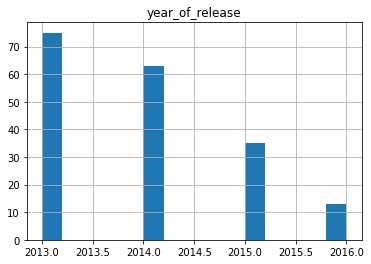

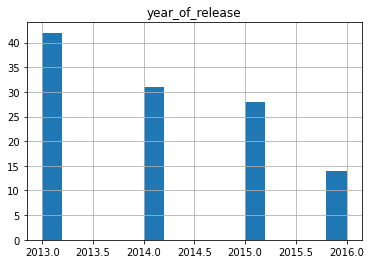

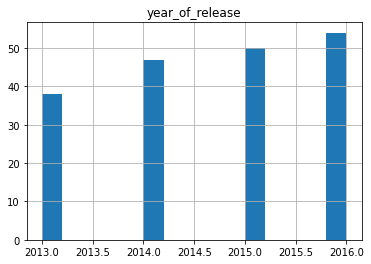

In [33]:
p_PS4.hist('year_of_release', bins=15);
p_PS3.hist('year_of_release', bins=15);
p_XOne.hist('year_of_release', bins=15);
p_3DS.hist('year_of_release', bins=15);
p_X360.hist('year_of_release', bins=15);
p_WiiU.hist('year_of_release', bins=15);
p_PC.hist('year_of_release', bins=15);

Потенциально прибыльными, являются PS4, XOne, PC. 

Хоть цикл жизни 3DS подходит к концу, продажи все равно на высоком уровне, возможно, на 2017 год есть смысл поддерживать

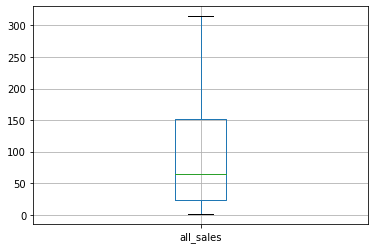

In [34]:
#Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
new_df.pivot_table(index='platform', values='all_sales', aggfunc='sum').boxplot();


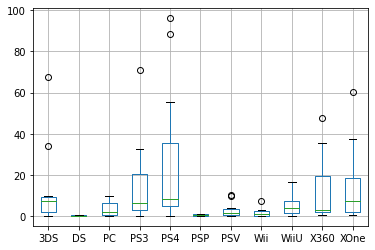

In [35]:
new_df.pivot_table(index='genre',columns='platform', values='all_sales', aggfunc='sum').boxplot();

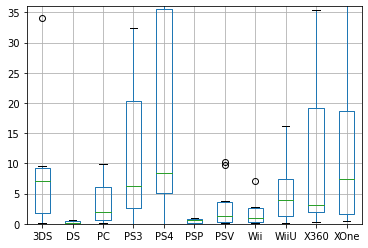

In [36]:
plt.ylim(0,36)
new_df.pivot_table(index='genre',
                   columns='platform', 
                   values='all_sales', 
                   aggfunc='sum').boxplot();

#### Вывод

<font><b>3DS</b></font><br>
Продажи более 9.1 - выбросы. Медиана, примерно, 7.1. БОльшая часть значения лежит в диапазоне (1.7,7)

<font><b>DS</b></font><br>
Продажи более 0.7 - выбросы. 
Медиана, примерно, 0.15. 
бОльшая часть значения лежит в диапазоне (0.15,0.43)

<font><b>PC</b></font><br>
Продажи более 9.8 - выбросы. 
Медиана - 2. 
бОльшая часть значения лежит в диапазоне (2,6)

<font><b>PS3</b></font><br>
Продажи более 32.4 - выбросы. 
Медиана, примерно, 6.2. 
бОльшая часть значения лежит в диапазоне (6.2,20.3).

<font><b>PS4</b></font><br>
Продажи более 55.6 - выбросы. 
Медиана, примерно, 8.4. 
бОльшая часть значения лежит в диапазоне (8.4,35.6)

<font><b>PSP</b></font><br>
Продажи более 1 - выбросы. 
Медиана, примерно, 0.7. 
бОльшая часть значения лежит в диапазоне (0.1,0.7)

<font><b>PSV</b></font><br>
Продажи более 3.84 - выбросы
Медиана, примерно, 1.3
бОльшая часть значения лежит в диапазоне (1,3.5)

<font><b>Wii</b></font><br>
Продажи более 2.8 - выбросы. 
Медиана - 1. 
бОльшая часть значения лежит в диапазоне (1,2.5)

<font><b>WiiU</b></font><br>
Продажи более 16 - выбросы. 
Медиана - 4. 
бОльшая часть значения лежит в диапазоне (4,7.3)

<font><b>X360</b></font><br>
Продажи более 35.5 - выбросы. 
Медиана, примерно, 3. 
бОльшая часть значения лежит в диапазоне (3,19.2)

<font><b>XOne</b></font><br>
Продажи более 37.2 - выбросы. 
Медиана, примерно, 7.5. 
бОльшая часть значения лежит в диапазоне (7.5,8.6)

Продажи более 500 - выбросы

Медиана, примерно, 140

бОльшая часть значения лежит в диапазоне до 250 

### Исследования отдельных платформ

In [37]:
#Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
#Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

0.41


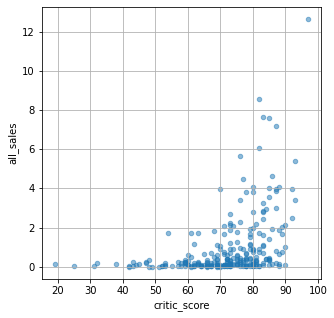

In [38]:
p_PS4.plot(x='critic_score', y='all_sales', kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True);
print(p_PS4['all_sales'].corr(p_PS4['critic_score']).round(2))

-0.03


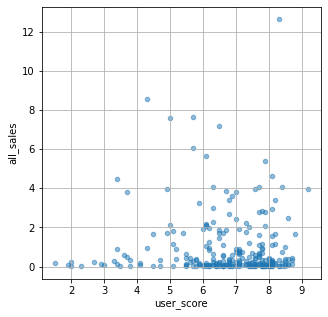

In [39]:
p_PS4.plot(x='user_score', y='all_sales', kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True);
print(p_PS4['all_sales'].corr(p_PS4['user_score']).round(2))

величина коэффициента корреляции между critic_score и all_sales
равна 0,33 -  это слабая корреляция;

величина коэффициента корреляции между user_score и all_sales
равна -0,03, связи почти нет.

на остальных платформах, результаты схожы


Коэффициент корреляции : 0.33

Коэффициент корреляции : 0.42

Коэффициент корреляции : 0.36

Коэффициент корреляции : 0.38

Коэффициент корреляции : 0.2


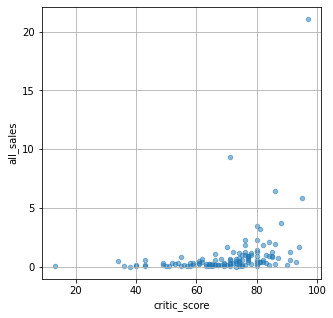

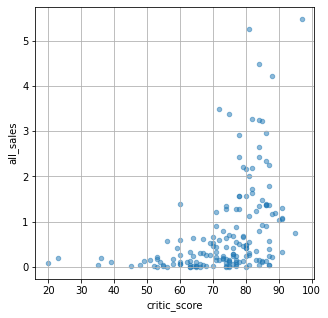

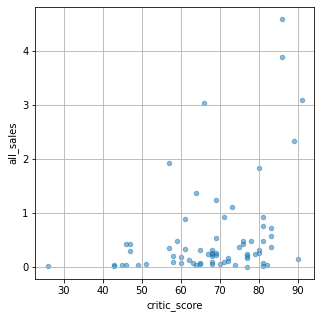

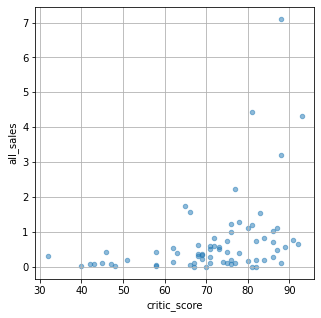

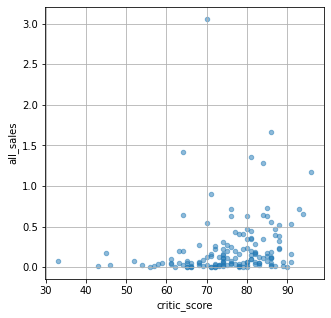

In [40]:
pltfrm_list = [p_PS3, p_XOne, p_3DS,p_WiiU, p_PC]
for x in pltfrm_list:
  x.plot(x='critic_score', 
         y='all_sales', 
         kind='scatter',
         alpha= 0.5, 
         figsize=(5, 5),
         grid=True)
  print()
  print('Коэффициент корреляции',':', x['all_sales'].corr(x['critic_score']).round(2))


Коэффициент корреляции : 0.0024

Коэффициент корреляции : -0.0689

Коэффициент корреляции : 0.2415

Коэффициент корреляции : 0.4193

Коэффициент корреляции : -0.0938


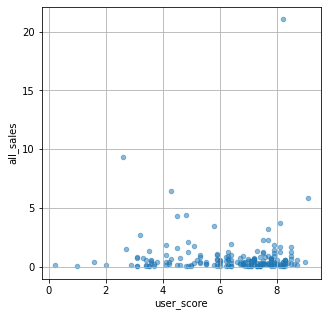

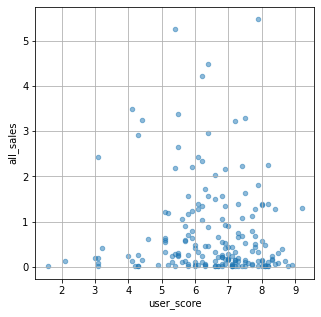

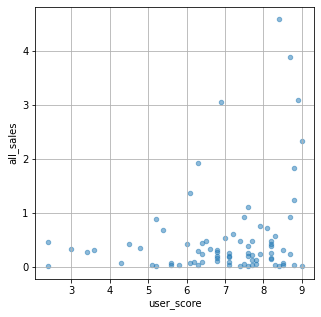

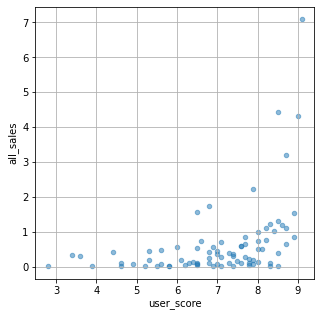

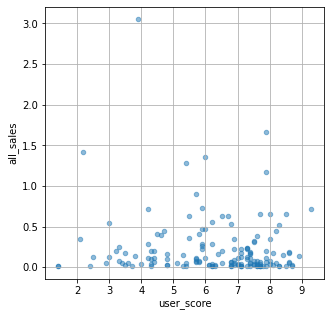

In [41]:
pltfrm_list = [p_PS3, p_XOne, p_3DS,p_WiiU, p_PC]
for x in pltfrm_list:
  x.plot(x='user_score', 
         y='all_sales', 
         kind='scatter',
         alpha= 0.5, 
         figsize=(5, 5),
         grid=True)
  print()
  print('Коэффициент корреляции',':', x['all_sales'].corr(x['user_score']).round(4))

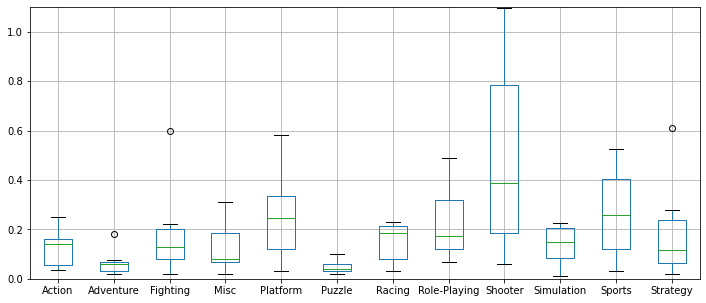

In [42]:
#Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? 
#Выделяются ли жанры с высокими и низкими продажами?
#new_df.groupby('genre')['all_sales'].sum().sort_values(ascending=False)
new_df.pivot_table(index='platform', 
                   values='all_sales', 
                   columns='genre', 
                   aggfunc='median'
).boxplot(figsize=(12,5));
plt.ylim(0,1.1);

In [43]:
new_df['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

#### Вывод

Shooter, Sports и Platform имееют устойчивый спрос, а Action выглядит посредственно 

## Портрет пользователя каждого региона

### Популярные платформы EU

,eu_sales,shares
platform,,
PS4,141.09,35.97
PS3,67.81,17.29
other_sales,58.26,14.86
XOne,51.59,13.15
X360,42.52,10.84
3DS,30.96,7.89


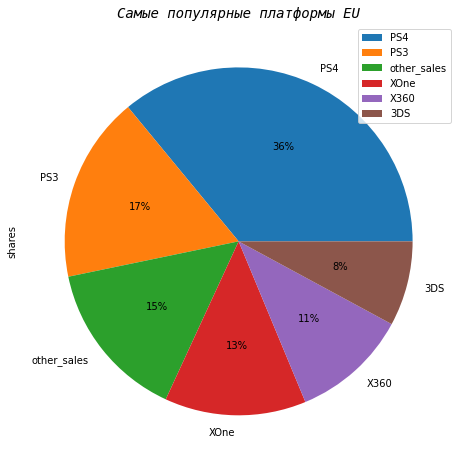

In [44]:
platform_eu = new_df.pivot_table(index='platform', values=['eu_sales'], aggfunc='sum')

platform_eu['shares'] = (platform_eu['eu_sales'] / sum(platform_eu['eu_sales']) * 100).round(2)

platform_eu.loc['other_sales'] = ['58.26', '14.86']
platform_eu['eu_sales']=platform_eu['eu_sales'].astype('float64')
platform_eu['shares']=platform_eu['shares'].astype('float64')

display(platform_eu.sort_values('eu_sales' ,ascending=False).head(6))

platform_eu.sort_values(
    'eu_sales',
    ascending=False
).head(6).plot(kind='pie', y='shares',figsize=(8,8),autopct='%1.f%%').set_title(
    "Самые популярные платформы EU",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 14
);

### Популярные платформы JP

,jp_sales,shares
platform,,
3DS,67.81,48.17
PS3,23.35,16.59
PSV,18.59,13.21
PS4,15.96,11.34
WiiU,10.88,7.73
other_sales,4.19,2.98


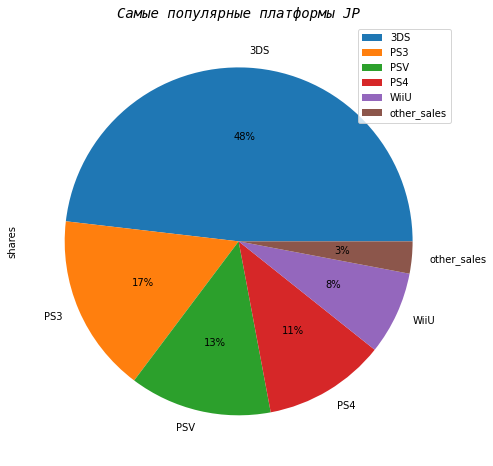

In [45]:
platform_jp = new_df.pivot_table(index='platform', values=['jp_sales'], aggfunc='sum')
platform_jp['shares'] = (platform_jp['jp_sales'] / sum(platform_jp['jp_sales']) * 100).round(2)

platform_jp.loc['other_sales'] = ['4.19', '2.98']
platform_jp['jp_sales']=platform_jp['jp_sales'].astype('float64')
platform_jp['shares']=platform_jp['shares'].astype('float64')

display(platform_jp.sort_values('jp_sales' ,ascending=False).head(6))

platform_jp.sort_values(
    'jp_sales',
    ascending=False
).head(6).plot(kind='pie', y='shares',figsize=(8,8),autopct='%1.f%%').set_title(
    "Самые популярные платформы JP",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 14
);

### Популярные платформы NA

,na_sales,shares
platform,,
PS4,108.74,24.84
XOne,93.12,21.27
X360,81.66,18.66
PS3,63.50,14.51
other_sales,56.68,14.97
3DS,38.20,8.73


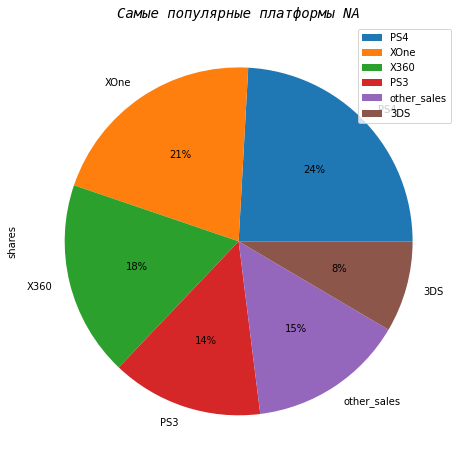

In [46]:
platform_na = new_df.pivot_table(index='platform', values=['na_sales'], aggfunc='sum')
platform_na['shares'] = (platform_na['na_sales'] / sum(platform_na['na_sales']) * 100).round(2)

platform_na.loc['other_sales'] = ['56.68', '14.97']
platform_na['na_sales']=platform_na['na_sales'].astype('float64')
platform_na['shares']=platform_na['shares'].astype('float64')

display(platform_na.sort_values('na_sales' ,ascending=False).head(6))

platform_na.sort_values('na_sales',ascending=False).head(6).plot(
    kind='pie', y='shares',figsize=(8,8),autopct='%1.f%%').set_title(
    "Самые популярные платформы NA",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 14
);

### Вывод
3DS в JP занимает 48%, в других регионах эта платформа не имеет такого успеха.
PS3 на 2-ом месте с 17%, PSV на 3-ем месте с 13%.


в EU лидирует PS4 - 36%, далее PS3 с 17%
XOne на 3-ем месте с 13%


в NA лидирует PS4 - 24%, далее XOne с 21%
X360 на 3-ем месте с 18%.
PS3 имеет только 14%

### Популярные жанры EU

,eu_sales,shares
genre,,
Action,118.13,30.12
Shooter,87.86,22.40
other_genre,68.56,17.47
Sports,60.52,15.43
Role-Playing,36.97,9.43
Racing,20.19,5.15


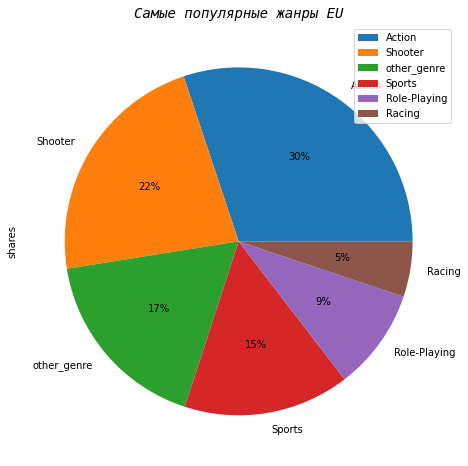

In [47]:
genre_eu = new_df.pivot_table(index='genre', values=['eu_sales'], aggfunc='sum')
genre_eu['shares'] = (genre_eu['eu_sales'] / sum(genre_eu['eu_sales']) * 100).round(2)

genre_eu.loc['other_genre'] = ['68.56', '17.47']
genre_eu['eu_sales']=genre_eu['eu_sales'].astype('float64')
genre_eu['shares']=genre_eu['shares'].astype('float64')

display(genre_eu.sort_values('eu_sales' ,ascending=False).head(6))

genre_eu.sort_values(
    'eu_sales',
    ascending=False
).head(6).plot(kind='pie', y='shares',figsize=(8,8),autopct='%1.f%%').set_title(
    "Самые популярные жанры EU",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 14
);

### Популярные жанры NA

,na_sales,shares
genre,,
Action,126.05,28.80
Shooter,109.74,25.07
Sports,65.27,14.91
other_genre,62.76,14.33
Role-Playing,46.40,10.60
Misc,27.49,6.28


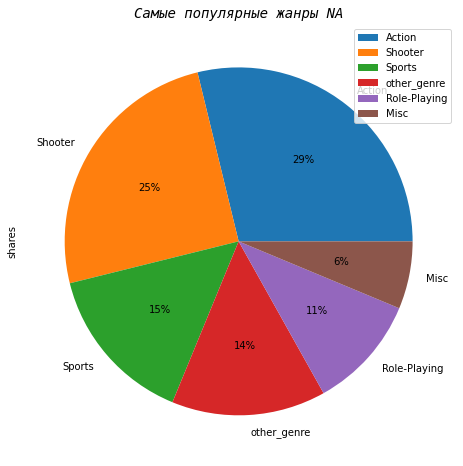

In [48]:
genre_na = new_df.pivot_table(index='genre', values=['na_sales'], aggfunc='sum')
genre_na['shares'] = (genre_na['na_sales'] / sum(genre_na['na_sales']) * 100).round(2)

genre_na.loc['other_genre'] = ['62.76', '14.33']
genre_na['na_sales']=genre_na['na_sales'].astype('float64')
genre_na['shares']=genre_na['shares'].astype('float64')

display(genre_na.sort_values('na_sales' ,ascending=False).head(6))

genre_na.sort_values(
    'na_sales',
    ascending=False
).head(6).plot(kind='pie', y='shares',figsize=(8,8),autopct='%1.f%%').set_title(
    "Самые популярные жанры NA",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 14
);

### Популярные жанры JP

,jp_sales,shares
genre,,
Role-Playing,51.04,36.26
Action,40.49,28.76
other_genre,25.79,18.31
Misc,9.20,6.54
Fighting,7.65,5.43
Shooter,6.61,4.70


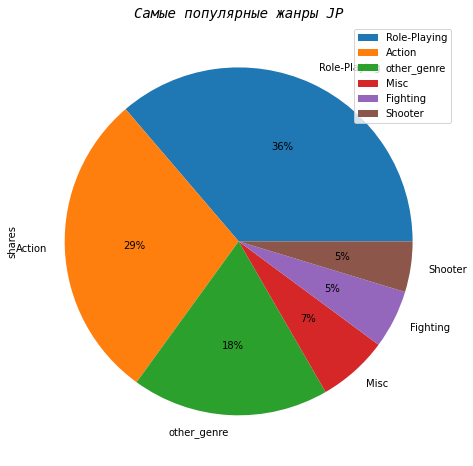

In [49]:
genre_jp = new_df.pivot_table(index='genre', values=['jp_sales'], aggfunc='sum')
genre_jp['shares'] = (genre_jp['jp_sales'] / sum(genre_jp['jp_sales']) * 100).round(2)

genre_jp.loc['other_genre'] = ['25.79', '18.31']
genre_jp['jp_sales']=genre_jp['jp_sales'].astype('float64')
genre_jp['shares']=genre_jp['shares'].astype('float64')

display(genre_jp.sort_values('jp_sales' ,ascending=False).head(6))

genre_jp.sort_values(
    'jp_sales',
    ascending=False
).head(6).plot(kind='pie', y='shares',figsize=(8,8),autopct='%1.f%%').set_title(
    "Самые популярные жанры JP",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 14
);

### Вывод
Action в EU занимает 30%, в NA доля схожа(29%)
Shooter на 2-ом месте с 22%, в NA место тоже, доля больше (25%)
Sports в EU (15%) и NA (15%) на 3 месте.

В JP на 1-ом месте Role-Playing(36%), следом Action (29%), замыкает Misc (7%)


### Рейтинг ESRB в EU

,eu_sales,shares
rating,,
M,145.32,46.38
E,83.36,26.61
E10+,42.69,13.63
T,41.95,13.39


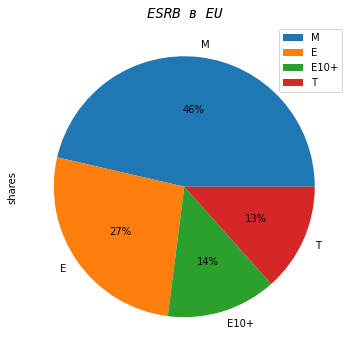

In [50]:
rating_eu = new_df.pivot_table(index='rating', values=['eu_sales'], aggfunc='sum')
rating_eu['shares'] = (rating_eu['eu_sales'] / sum(rating_eu['eu_sales']) * 100).round(2)

display(rating_eu.sort_values('eu_sales' ,ascending=False))

rating_eu.sort_values(
    'eu_sales',
    ascending=False
).head(6).plot(kind='pie', y='shares',figsize=(6,6),autopct='%1.f%%').set_title(
    "ESRB в EU",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 14
);

### Рейтинг ESRB в JP

,jp_sales,shares
rating,,
T,20.59,36.95
E,15.14,27.17
M,14.11,25.32
E10+,5.89,10.57


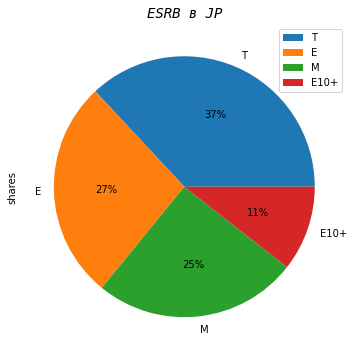

In [51]:
rating_jp = new_df.pivot_table(index='rating', values=['jp_sales'], aggfunc='sum')
rating_jp['shares'] = (rating_jp['jp_sales'] / sum(rating_jp['jp_sales']) * 100).round(2)

display(rating_jp.sort_values('jp_sales' ,ascending=False))

rating_jp.sort_values(
    'jp_sales',
    ascending=False
).head(6).plot(kind='pie', y='shares',figsize=(6,6),autopct='%1.f%%').set_title(
    "ESRB в JP",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 14
);

### Рейтинг ESRB в NA

,na_sales,shares
rating,,
M,165.21,37.74
another_raiting,89.42,20.43
E,79.05,18.06
E10+,54.24,12.39
T,49.79,11.38


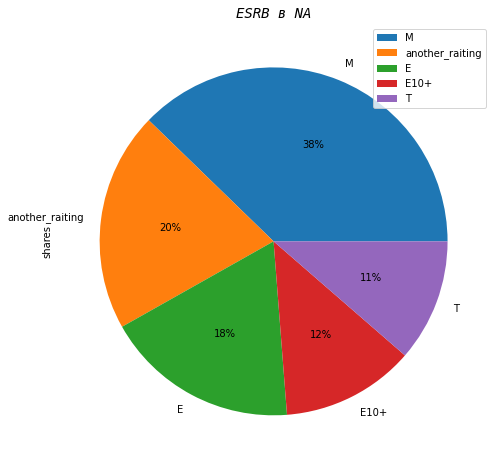

In [52]:
zaglushka = new_df.copy()
zaglushka['rating'] = zaglushka['rating'].fillna("another_raiting")
rating_na = zaglushka.pivot_table(index='rating', values=['na_sales'], aggfunc='sum')
rating_na['shares'] = (rating_na['na_sales'] / sum(rating_na['na_sales']) * 100).round(2)

display(rating_na.sort_values('na_sales' ,ascending=False).head(6))

rating_na.sort_values(
    'na_sales',
    ascending=False
).head(6).plot(kind='pie', y='shares',figsize=(8,8),autopct='%1.f%%').set_title(
    "ESRB в NA",
    fontfamily = 'monospace',
    fontstyle = 'oblique',
    fontsize = 14
);

### Вывод

В EU на 1-ом месте - игры с рейтингом М (46%), на 2-ом - рейтинг Е (27%), 3-е мечто делят Е10+ и Т (13%)


В NA 1-ом месте - игры с рейтингом М (38%), на 2-ом - категория не имеющая рейтинг (20%), 3-м месте Е10+ (12%)


В JP 1-ом месте - игры с рейтингом Т (37%), на 2-ом - Е (27%), 3-м месте М (25%)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [54]:
from scipy import stats as st

<font><font color='purple'><b>H0.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b></font><br>

<font><font color='purple'><b>Н1.Средние пользовательские рейтинги платформ Xbox One и PC разные</b></font><br>

In [55]:
xbox_one = new_df.query('platform == "XOne"')['user_score']
pc = new_df.query('platform == "PC"')['user_score']

In [56]:
alpha = .05

rslt = st.ttest_ind(xbox_one,pc, nan_policy='omit')


print('p-значение:', (rslt.pvalue))


if rslt.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получается отвергать нулевую гипотезу')

p-значение: 0.14012658403611503
Не получается отвергать нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

<font><font color='purple'><b>H0.Средние пользовательские рейтинги жанров Action и Sports разные</b></font><br>

<font><font color='purple'><b>Н1.Средние пользовательские рейтинги жанра Action больше, чем рейтинги жанра Sports</b></font><br>

In [57]:
action = new_df.query('genre == "Action"')['user_score']
sports = new_df.query('genre == "Sports"')['user_score']

In [58]:
alpha = .05
rslt = st.ttest_ind(action,sports, nan_policy='omit')
print('p-значение:', rslt.pvalue)
if rslt.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получается отвергать нулевую гипотезу')

p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


### Вывод

Как видно из кода, нулевую гипотезу «Средние пользовательские рейтинги жанров Action и Sports разные» отвергнуть не получилось. Скорее всего, средние пользовательские рейтинги платформ Xbox One и PC одинаковые

## Общий вывод

<font color='orange'><b>платформа:</b></font><br>

3DS в JP занимает 48%, в других регионах эта платформа не имеет такого успеха.
PS3 на 2-ом месте с 17%, PSV на 3-ем месте с 13%.

в EU лидирует PS4 - 36%, далее PS3 с 17%
XOne на 3-ем месте с 13%

в NA лидирует PS4 - 24%, далее XOne с 21%
X360 на 3-ем месте с 18%.
PS3 имеет только 14%

<font color='orange'><b>жанр:</b></font><br>

Action в EU занимает 30%, в NA доля схожа(29%)

Shooter на 2-ом месте с 22%, в NA место тоже, доля больше (25%)

Sports в EU (15%) и NA (15%) на 3 месте.

В JP на 1-ом месте Role-Playing(36%), следом Action (29%), замыкает Misc (7%)

<font color='orange'><b>рейтинг:</b></font><br>

В EU на 1-ом месте - игры с рейтингом М (46%), на 2-ом - рейтинг Е (27%), 3-е мечто делят Е10+ и Т (13%)

В NA 1-ом месте - игры с рейтингом М (38%), на 2-ом - категория не имеющая рейтинг (20%), 3-м месте Е10+ (12%)

В JP 1-ом месте - игры с рейтингом Т (37%), на 2-ом - Е (27%), 3-м месте М (25%)


Целесообразней вкладываться в рекламу игр на PS4, в жанрах Shooter и Action, с рейтингом M.